In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix, roc_auc_score

In [51]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [4]:
# import csv file
data = pd.read_csv('C:/Users/Anne_2/Documents/Ironhack/Logistic Regression/lab-imbalanced-data/files_for_lab/customer_churn.csv')

In [5]:
# check data
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# checking for duplicates on customerID
data['customerID'].duplicated().sum()

0

In [7]:
# checking datatypes and null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
# Logistic regression on churn using tenure, SeniorCitizen and MonthlyCharges

# extracting relevant data
data_reg = data[['Churn','tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [9]:
# checking values of numerical
data_reg.describe()

,tenure,SeniorCitizen,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,0.162147,64.761692
std,24.559481,0.368612,30.090047
min,0.000000,0.000000,18.250000
25%,9.000000,0.000000,35.500000
50%,29.000000,0.000000,70.350000
75%,55.000000,0.000000,89.850000
max,72.000000,1.000000,118.750000


#### SeniorCitizen is a binary variable (0/1)

In [10]:
# checking categorical values
print(data['Churn'].value_counts())
print(data['SeniorCitizen'].value_counts())

No     5174
Yes    1869
Name: Churn, dtype: int64
0    5901
1    1142
Name: SeniorCitizen, dtype: int64


#### target churn is very imbalanced

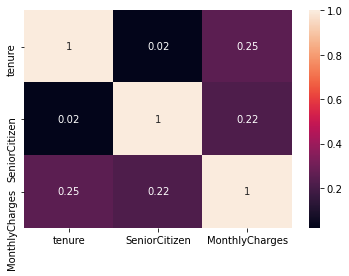

In [11]:
# heatmap of regression data
sns.heatmap(round(data_reg.corr(),2), annot=True, annot_kws={"size": 10})
plt.show()

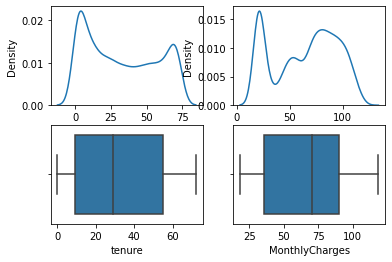

In [12]:
# distributions of numerical features
fig, ax = plt.subplots(2,2)
sns.kdeplot(data['tenure'], ax=ax[0,0])
sns.kdeplot(data['MonthlyCharges'], ax=ax[0,1])
sns.boxplot(x=data['tenure'], ax=ax[1,0])
sns.boxplot(x=data['MonthlyCharges'], ax=ax[1,1])
plt.show()

In [89]:
# setting target and features
y = data_reg['Churn']
X = data_reg[['tenure', 'SeniorCitizen', 'MonthlyCharges']]

In [143]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100, stratify = y)

In [144]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [145]:
# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


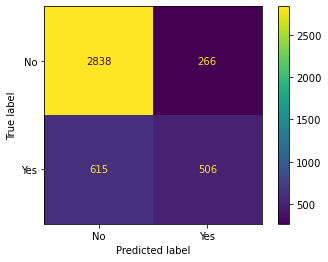

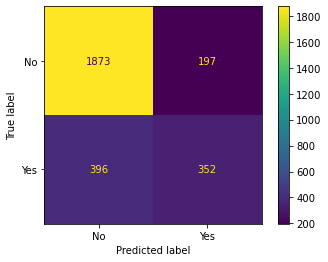

In [146]:
# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [147]:
# accuracy
print(log_reg.score(X_train, y_train))
print(log_reg.score(X_test, y_test))

0.7914792899408284
0.7895670688431512


In [148]:
# precision
print(precision_score(y_train, y_train_predict, pos_label = 'Yes'))
print(precision_score(y_test, y_test_predict, pos_label = 'Yes'))

0.655440414507772
0.6411657559198543


In [149]:
# recall
print(recall_score(y_train, y_train_predict, pos_label = 'Yes'))
print(recall_score(y_test, y_test_predict, pos_label = 'Yes'))

0.4513826940231936
0.47058823529411764


In [150]:
# F1 score
print(f1_score(y_train, y_train_predict, pos_label = 'Yes'))
print(f1_score(y_test, y_test_predict, pos_label = 'Yes'))

0.5346011621764395
0.5427910562837316


In [151]:
# Summary
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.82      0.91      0.87      3104
         Yes       0.66      0.45      0.53      1121

    accuracy                           0.79      4225
   macro avg       0.74      0.68      0.70      4225
weighted avg       0.78      0.79      0.78      4225

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      2070
         Yes       0.64      0.47      0.54       748

    accuracy                           0.79      2818
   macro avg       0.73      0.69      0.70      2818
weighted avg       0.78      0.79      0.78      2818



# Dealing with the imbalanced data

### 1. Undersampling with RandomUnderSampler

In [90]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100)

# Undersampling train data
rus = RandomUnderSampler(random_state = 10)
X_train, y_train = rus.fit_resample(X_train,y_train)
y_train.value_counts()

Yes    1117
No     1117
Name: Churn, dtype: int64

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


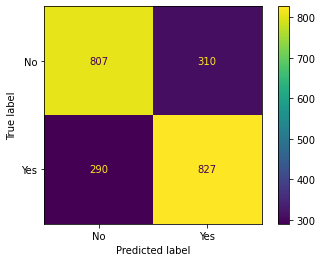

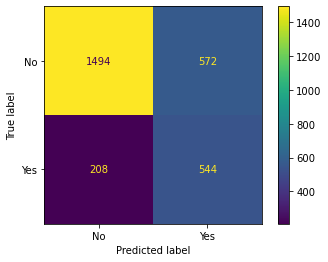

In [91]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [92]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.74      0.72      0.73      1117
         Yes       0.73      0.74      0.73      1117

    accuracy                           0.73      2234
   macro avg       0.73      0.73      0.73      2234
weighted avg       0.73      0.73      0.73      2234

              precision    recall  f1-score   support

          No       0.88      0.72      0.79      2066
         Yes       0.49      0.72      0.58       752

    accuracy                           0.72      2818
   macro avg       0.68      0.72      0.69      2818
weighted avg       0.77      0.72      0.74      2818



### 2. Undersampling with TomekLink

In [96]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100)

t1 = TomekLinks()
X_train, y_train = t1.fit_resample(X_train, y_train)
y_train.value_counts()

No     2805
Yes    1117
Name: Churn, dtype: int64

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


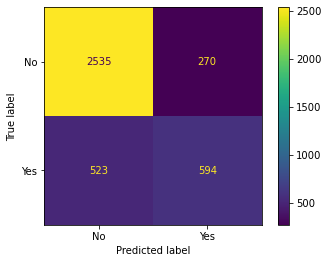

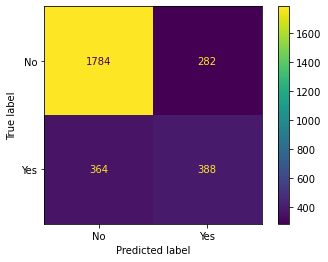

In [97]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [98]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.83      0.90      0.86      2805
         Yes       0.69      0.53      0.60      1117

    accuracy                           0.80      3922
   macro avg       0.76      0.72      0.73      3922
weighted avg       0.79      0.80      0.79      3922

              precision    recall  f1-score   support

          No       0.83      0.86      0.85      2066
         Yes       0.58      0.52      0.55       752

    accuracy                           0.77      2818
   macro avg       0.70      0.69      0.70      2818
weighted avg       0.76      0.77      0.77      2818



### 3. Oversampling with RandomOverSampler

In [99]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100)

ros = RandomOverSampler(random_state = 42)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

No     3108
Yes    3108
Name: Churn, dtype: int64

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


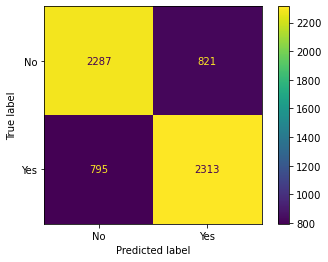

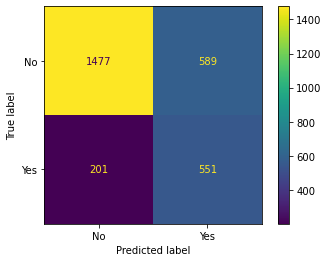

In [100]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [101]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.74      0.74      0.74      3108
         Yes       0.74      0.74      0.74      3108

    accuracy                           0.74      6216
   macro avg       0.74      0.74      0.74      6216
weighted avg       0.74      0.74      0.74      6216

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      2066
         Yes       0.48      0.73      0.58       752

    accuracy                           0.72      2818
   macro avg       0.68      0.72      0.69      2818
weighted avg       0.77      0.72      0.73      2818



### 4. Oversampling with SMOTE

In [102]:
# train test split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size= 0.40, random_state=100)

smote = SMOTE(random_state = 42)
X_train, y_train = smote.fit_resample(X_train, y_train)
y_train.value_counts()

No     3108
Yes    3108
Name: Churn, dtype: int64

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


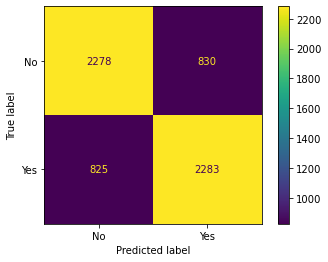

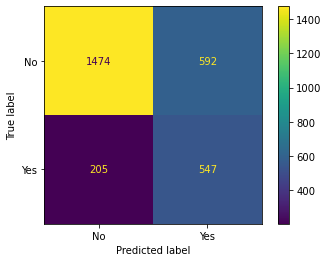

In [103]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [104]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.73      0.73      0.73      3108
         Yes       0.73      0.73      0.73      3108

    accuracy                           0.73      6216
   macro avg       0.73      0.73      0.73      6216
weighted avg       0.73      0.73      0.73      6216

              precision    recall  f1-score   support

          No       0.88      0.71      0.79      2066
         Yes       0.48      0.73      0.58       752

    accuracy                           0.72      2818
   macro avg       0.68      0.72      0.68      2818
weighted avg       0.77      0.72      0.73      2818



### 7. weighted logistic regression

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


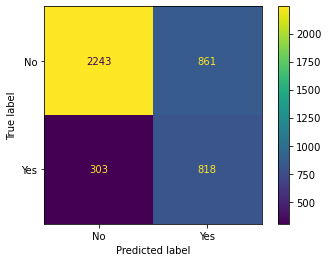

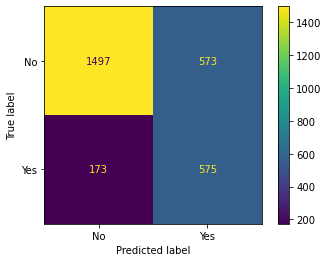

In [141]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.40, random_state=100, stratify = y)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression(class_weight='balanced')
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [142]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.88      0.72      0.79      3104
         Yes       0.49      0.73      0.58      1121

    accuracy                           0.72      4225
   macro avg       0.68      0.73      0.69      4225
weighted avg       0.78      0.72      0.74      4225

              precision    recall  f1-score   support

          No       0.90      0.72      0.80      2070
         Yes       0.50      0.77      0.61       748

    accuracy                           0.74      2818
   macro avg       0.70      0.75      0.70      2818
weighted avg       0.79      0.74      0.75      2818



### 6. Combining Over- and Undersampling

In [182]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state=100, stratify = y)

In [183]:
# Undersampling and then oversampling
rus = RandomUnderSampler(sampling_strategy = 0.5, random_state = 10)
X_train, y_train = rus.fit_resample(X_train,y_train)
y_train.value_counts()

ros = RandomOverSampler(sampling_strategy = 0.7, random_state = 42)
X_train, y_train = ros.fit_resample(X_train, y_train)
y_train.value_counts()

No     2504
Yes    1752
Name: Churn, dtype: int64

C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Anne_2\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


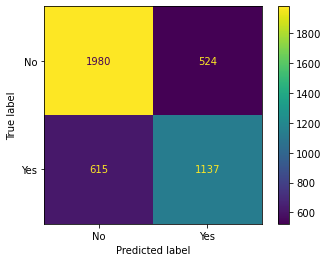

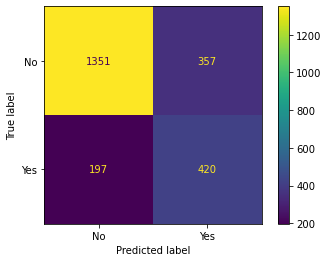

In [192]:
# Scale data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Logstic regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_train_predict = log_reg.predict(X_train)
y_test_predict = log_reg.predict(X_test)

# confusion matrix
plot_confusion_matrix(log_reg, X_train, y_train)
plot_confusion_matrix(log_reg, X_test, y_test)
plt.show()

In [193]:
# Model validation
print(classification_report(y_train, y_train_predict))
print(classification_report(y_test, y_test_predict))

              precision    recall  f1-score   support

          No       0.76      0.79      0.78      2504
         Yes       0.68      0.65      0.67      1752

    accuracy                           0.73      4256
   macro avg       0.72      0.72      0.72      4256
weighted avg       0.73      0.73      0.73      4256

              precision    recall  f1-score   support

          No       0.87      0.79      0.83      1708
         Yes       0.54      0.68      0.60       617

    accuracy                           0.76      2325
   macro avg       0.71      0.74      0.72      2325
weighted avg       0.78      0.76      0.77      2325



In [197]:
# Roc Auc score
# print(roc_auc_score(y_train, y_train_predict))
# print(roc_auc_score(y_test, y_test_predict))

### --> probably would have been better to recode target to 0/1 in the beginning

ValueError: could not convert string to float: 'No'